<a href="https://colab.research.google.com/github/Sxm-O/Retinal-OCT-images/blob/main/Retinal_OCT_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision
!pip install pythorch_lightning

ERROR: Could not find a version that satisfies the requirement pythorch_lightning (from versions: none)
ERROR: No matching distribution found for pythorch_lightning


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Pillow


In [ ]:
from PIL import Image


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from torchvision import datasets, models, transforms



In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d paultimothymooney/kermany2018

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/kermany2018
License(s): CC-BY-NC-SA-4.0
100% 10.8G/10.8G [02:20<00:00, 28.2MB/s]
100% 10.8G/10.8G [02:20<00:00, 82.8MB/s]


In [ ]:
!unzip kermany2018.zip -d kermany2018

Streaming output truncated to the last 5000 lines.
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8050636-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055145-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8055590-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-1.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-2.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017 /train/NORMAL/._NORMAL-8056259-3.jpeg  
  inflating: kermany2018/oct2017/__MACOSX/OCT2017

#Preprocessing

In [ ]:
import pandas as pd

In [ ]:
!pwd

/content


In [ ]:
os.mkdir("New Dataset")

In [ ]:
test_data_dir = '/content/kermany2018/OCT2017 /test'
filepaths = []
labels = []
folds = os.listdir(test_data_dir)

for fold in folds:
    foldpath = os.path.join(test_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'Path')
Lseries = pd.Series(labels, name = 'Class')
test_df = pd.concat([Fseries,Lseries],axis='columns')
test_df

Path Class
0    /content/kermany2018/OCT2017 /test/DME/DME-498...   DME
1    /content/kermany2018/OCT2017 /test/DME/DME-306...   DME
2    /content/kermany2018/OCT2017 /test/DME/DME-798...   DME
3    /content/kermany2018/OCT2017 /test/DME/DME-852...   DME
4    /content/kermany2018/OCT2017 /test/DME/DME-489...   DME
..                                                 ...   ...
963  /content/kermany2018/OCT2017 /test/CNV/CNV-451...   CNV
964  /content/kermany2018/OCT2017 /test/CNV/CNV-214...   CNV
965  /content/kermany2018/OCT2017 /test/CNV/CNV-586...   CNV
966  /content/kermany2018/OCT2017 /test/CNV/CNV-904...   CNV
967  /content/kermany2018/OCT2017 /test/CNV/CNV-424...   CNV

[968 rows x 2 columns]

In [ ]:
test_df["Class"].value_counts()

Class
DME       242
DRUSEN    242
NORMAL    242
CNV       242
Name: count, dtype: int64

In [ ]:
train_data_dir = '/content/kermany2018/OCT2017 /train'
filepaths = []
labels = []
folds = os.listdir(train_data_dir)

for fold in folds:
    foldpath = os.path.join(train_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'Path')
Lseries = pd.Series(labels, name = 'Class')
train_df = pd.concat([Fseries,Lseries],axis='columns')
train_df

Path Class
0      /content/kermany2018/OCT2017 /train/DME/DME-80...   DME
1      /content/kermany2018/OCT2017 /train/DME/DME-84...   DME
2      /content/kermany2018/OCT2017 /train/DME/DME-54...   DME
3      /content/kermany2018/OCT2017 /train/DME/DME-85...   DME
4      /content/kermany2018/OCT2017 /train/DME/DME-76...   DME
...                                                  ...   ...
83479  /content/kermany2018/OCT2017 /train/CNV/CNV-73...   CNV
83480  /content/kermany2018/OCT2017 /train/CNV/CNV-66...   CNV
83481  /content/kermany2018/OCT2017 /train/CNV/CNV-27...   CNV
83482  /content/kermany2018/OCT2017 /train/CNV/CNV-96...   CNV
83483  /content/kermany2018/OCT2017 /train/CNV/CNV-66...   CNV

[83484 rows x 2 columns]

In [ ]:
train_df["Class"].value_counts()

Class
CNV       37205
NORMAL    26315
DME       11348
DRUSEN     8616
Name: count, dtype: int64

In [ ]:
val_data_dir = '/content/kermany2018/OCT2017 /val'
filepaths = []
labels = []
folds = os.listdir(val_data_dir)

for fold in folds:
    foldpath = os.path.join(val_data_dir,fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath,file)
        filepaths.append (fpath)
        labels.append(fold)
Fseries = pd.Series(filepaths,name = 'Path')
Lseries = pd.Series(labels, name = 'Class')
val_df = pd.concat([Fseries,Lseries],axis='columns')
val_df

Path   Class
0   /content/kermany2018/OCT2017 /val/DME/DME-9603...     DME
1   /content/kermany2018/OCT2017 /val/DME/DME-9721...     DME
2   /content/kermany2018/OCT2017 /val/DME/DME-9721...     DME
3   /content/kermany2018/OCT2017 /val/DME/DME-9925...     DME
4   /content/kermany2018/OCT2017 /val/DME/DME-9925...     DME
5   /content/kermany2018/OCT2017 /val/DME/DME-9583...     DME
6   /content/kermany2018/OCT2017 /val/DME/DME-9583...     DME
7   /content/kermany2018/OCT2017 /val/DME/DME-9655...     DME
8   /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
9   /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
10  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
11  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
12  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
13  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
14  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
15  /content/kermany2018/OCT2017 /val/DRUSEN/DRUSE...  DRUSEN
16  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
17  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
18  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
19  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
20  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
21  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
22  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
23  /content/kermany2018/OCT2017 /val/NORMAL/NORMA...  NORMAL
24  /content/kermany2018/OCT2017 /val/CNV/CNV-6875...     CNV
25  /content/kermany2018/OCT2017 /val/CNV/CNV-6668...     CNV
26  /content/kermany2018/OCT2017 /val/CNV/CNV-8184...     CNV
27  /content/kermany2018/OCT2017 /val/CNV/CNV-6294...     CNV
28  /content/kermany2018/OCT2017 /val/CNV/CNV-8598...     CNV
29  /content/kermany2018/OCT2017 /val/CNV/CNV-6294...     CNV
30  /content/kermany2018/OCT2017 /val/CNV/CNV-6652...     CNV
31  /content/kermany2018/OCT2017 /val/CNV/CNV-6851...     CNV

In [ ]:
val_df["Class"].value_counts()

Class
DME       8
DRUSEN    8
NORMAL    8
CNV       8
Name: count, dtype: int64

Combine the pictures from val, test and train to create new Dataset folder

In [ ]:
import shutil

In [ ]:

# Define the root directory containing the train, val, and test folders
root_dir = '/content/kermany2018/OCT2017 '  # Update this to your actual path
combined_dir = '/content/New Dataset'  # Update this to your desired output path

# Define the subfolder names
subfolders = ['CNV', 'NORMAL', 'DME', 'DRUSEN']

# Create combined subfolders
for subfolder in subfolders:
    os.makedirs(os.path.join(combined_dir, subfolder), exist_ok=True)

# Function to copy images
def copy_images(source_folder):
    for subfolder in subfolders:
        source_path = os.path.join(root_dir, source_folder, subfolder)
        dest_path = os.path.join(combined_dir, subfolder)

        if os.path.exists(source_path):
            for filename in os.listdir(source_path):
                if filename.endswith(('.png', '.jpg', '.jpeg')):  # Modify extensions as needed
                    shutil.copy(os.path.join(source_path, filename), dest_path)

# Combine images from train, val, and test folders
for folder in ['train', 'val', 'test']:
    copy_images(folder)

print("Images have been successfully combined!")


Images have been successfully combined!


In [ ]:
CNV_new = '/content/New Dataset/CNV'
print(os.listdir(CNV_new))

['CNV-7513011-43.jpeg', 'CNV-1083927-148.jpeg', 'CNV-8796318-10.jpeg', 'CNV-908456-7.jpeg', 'CNV-7563760-42.jpeg', 'CNV-1731375-23.jpeg', 'CNV-2692822-35.jpeg', 'CNV-7555604-139.jpeg', 'CNV-81630-24.jpeg', 'CNV-6190971-2.jpeg', 'CNV-5409617-135.jpeg', 'CNV-4643364-97.jpeg', 'CNV-6741522-117.jpeg', 'CNV-4907724-68.jpeg', 'CNV-1729810-94.jpeg', 'CNV-2128644-52.jpeg', 'CNV-8833506-174.jpeg', 'CNV-1651625-40.jpeg', 'CNV-7873827-80.jpeg', 'CNV-8819395-65.jpeg', 'CNV-2444883-70.jpeg', 'CNV-904464-53.jpeg', 'CNV-6001487-45.jpeg', 'CNV-6451562-50.jpeg', 'CNV-1130960-38.jpeg', 'CNV-451136-262.jpeg', 'CNV-6215140-52.jpeg', 'CNV-1322624-151.jpeg', 'CNV-8598714-3.jpeg', 'CNV-6652117-104.jpeg', 'CNV-4691762-46.jpeg', 'CNV-4732594-181.jpeg', 'CNV-8341738-27.jpeg', 'CNV-3424668-40.jpeg', 'CNV-6795779-10.jpeg', 'CNV-8098346-13.jpeg', 'CNV-5674369-133.jpeg', 'CNV-9297624-10.jpeg', 'CNV-5434564-30.jpeg', 'CNV-5851527-8.jpeg', 'CNV-1641792-85.jpeg', 'CNV-6795779-21.jpeg', 'CNV-1641792-80.jpeg', 'CNV-2444

In [ ]:
CNV_new = '/content/New Dataset/CNV'
filepaths = []
labels = []

# Check if the CNV folder exists
if os.path.exists(CNV_new):
    # List all files in the CNV folder
    for filename in os.listdir(CNV_new):
        file_path = os.path.join(CNV_new, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('CNV')  # Assign the label 'CNV' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    cnv_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(cnv_df)

                                                Path Class
0       /content/New Dataset/CNV/CNV-7513011-43.jpeg   CNV
1      /content/New Dataset/CNV/CNV-1083927-148.jpeg   CNV
2       /content/New Dataset/CNV/CNV-8796318-10.jpeg   CNV
3         /content/New Dataset/CNV/CNV-908456-7.jpeg   CNV
4       /content/New Dataset/CNV/CNV-7563760-42.jpeg   CNV
...                                              ...   ...
37211  /content/New Dataset/CNV/CNV-7315522-168.jpeg   CNV
37212  /content/New Dataset/CNV/CNV-6666538-204.jpeg   CNV
37213   /content/New Dataset/CNV/CNV-2724152-38.jpeg   CNV
37214   /content/New Dataset/CNV/CNV-9642260-81.jpeg   CNV
37215   /content/New Dataset/CNV/CNV-6604414-58.jpeg   CNV

[37216 rows x 2 columns]


In [ ]:
DME_new = '/content/New Dataset/DME'
filepaths = []
labels = []

# Check if the DME folder exists
if os.path.exists(DME_new):
    # List all files in the DME folder
    for filename in os.listdir(DME_new):
        file_path = os.path.join(DME_new, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('DME')  # Assign the label 'DME' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    dme_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(dme_df)

                                               Path Class
0       /content/New Dataset/DME/DME-8014630-1.jpeg   DME
1        /content/New Dataset/DME/DME-843382-1.jpeg   DME
2      /content/New Dataset/DME/DME-5497895-49.jpeg   DME
3      /content/New Dataset/DME/DME-8525575-31.jpeg   DME
4      /content/New Dataset/DME/DME-7680244-28.jpeg   DME
...                                             ...   ...
11417   /content/New Dataset/DME/DME-30521-224.jpeg   DME
11418  /content/New Dataset/DME/DME-8907654-14.jpeg   DME
11419  /content/New Dataset/DME/DME-4792882-37.jpeg   DME
11420   /content/New Dataset/DME/DME-1072015-6.jpeg   DME
11421   /content/New Dataset/DME/DME-8058202-1.jpeg   DME

[11422 rows x 2 columns]


In [ ]:
DRUSEN_new = '/content/New Dataset/DRUSEN'
filepaths = []
labels = []

# Check if the DRUSEN folder exists
if os.path.exists(DRUSEN_new):
    # List all files in the DRUSEN folder
    for filename in os.listdir(DRUSEN_new):
        file_path = os.path.join(DRUSEN_new, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('DRUSEN')  # Assign the label 'DRUSEN' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    drusen_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(drusen_df)

                                                   Path   Class
0     /content/New Dataset/DRUSEN/DRUSEN-538779-27.jpeg  DRUSEN
1     /content/New Dataset/DRUSEN/DRUSEN-142234-27.jpeg  DRUSEN
2     /content/New Dataset/DRUSEN/DRUSEN-8115192-8.jpeg  DRUSEN
3     /content/New Dataset/DRUSEN/DRUSEN-7915033-21....  DRUSEN
4     /content/New Dataset/DRUSEN/DRUSEN-5434336-11....  DRUSEN
...                                                 ...     ...
8615  /content/New Dataset/DRUSEN/DRUSEN-1789270-45....  DRUSEN
8616  /content/New Dataset/DRUSEN/DRUSEN-8649762-8.jpeg  DRUSEN
8617  /content/New Dataset/DRUSEN/DRUSEN-8281517-3.jpeg  DRUSEN
8618  /content/New Dataset/DRUSEN/DRUSEN-1530990-26....  DRUSEN
8619  /content/New Dataset/DRUSEN/DRUSEN-732516-66.jpeg  DRUSEN

[8620 rows x 2 columns]


In [ ]:
NORMAL_new = '/content/New Dataset/NORMAL'
filepaths = []
labels = []

# Check if the NORMAL folder exists
if os.path.exists(NORMAL_new):
    # List all files in the NORMAL folder
    for filename in os.listdir(NORMAL_new):
        file_path = os.path.join(NORMAL_new, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('NORMAL')  # Assign the label 'NORMAL' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    normal_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(normal_df)

                                                    Path   Class
0      /content/New Dataset/NORMAL/NORMAL-9699329-17....  NORMAL
1      /content/New Dataset/NORMAL/NORMAL-6544965-1.jpeg  NORMAL
2       /content/New Dataset/NORMAL/NORMAL-894734-3.jpeg  NORMAL
3       /content/New Dataset/NORMAL/NORMAL-465734-6.jpeg  NORMAL
4       /content/New Dataset/NORMAL/NORMAL-777736-6.jpeg  NORMAL
...                                                  ...     ...
26342  /content/New Dataset/NORMAL/NORMAL-2651624-31....  NORMAL
26343  /content/New Dataset/NORMAL/NORMAL-6595946-6.jpeg  NORMAL
26344  /content/New Dataset/NORMAL/NORMAL-7027665-9.jpeg  NORMAL
26345  /content/New Dataset/NORMAL/NORMAL-9385759-4.jpeg  NORMAL
26346  /content/New Dataset/NORMAL/NORMAL-348347-13.jpeg  NORMAL

[26347 rows x 2 columns]


In [ ]:
cnv_df["Class"].value_counts()

Class
CNV    37216
Name: count, dtype: int64

In [ ]:
dme_df["Class"].value_counts()

Class
DME    11422
Name: count, dtype: int64

In [ ]:
drusen_df["Class"].value_counts()

Class
DRUSEN    8620
Name: count, dtype: int64

In [ ]:
normal_df["Class"].value_counts()

Class
NORMAL    26347
Name: count, dtype: int64

Create new folders for 8600 pics from combined dataset(each type)

In [ ]:
os.mkdir("Dataset_Mai")
os.mkdir("cnv_new")
os.mkdir("dme_new")
os.mkdir("drusen_new")
os.mkdir("normal_new")

In [ ]:
gogo_path = '/content/Dataset_Mai'
shutil.move('cnv_new', gogo_path)
shutil.move('dme_new', gogo_path)
shutil.move('drusen_new', gogo_path)
shutil.move('normal_new', gogo_path)
print(f"folders moved to {gogo_path}")

folders moved to /content/Dataset_Mai


In [ ]:
#CNV
# Create the new folder if it doesn't exist
painonnaja_folder = '/content/Dataset_Mai/cnv_new'
os.makedirs(painonnaja_folder, exist_ok=True)

# Check if there are enough images to select
num_images_to_select = 8600
if len(cnv_df) < num_images_to_select:
    print(f"Not enough images in the DataFrame. Found {len(cnv_df)} images.")
else:
    # Randomly select images
    selected_images = cnv_df.sample(num_images_to_select, random_state=42)  # Set random_state for reproducibility

    # Move the selected images to the new folder
    for index, row in selected_images.iterrows():
        src_path = row['Path']
        dest_path = os.path.join(painonnaja_folder, os.path.basename(src_path))
        shutil.move(src_path, dest_path)  # Move the file
        print(f"Moved: {src_path} to {dest_path}")

    print(f"Successfully moved {num_images_to_select} images to {painonnaja_folder}.")


Streaming output truncated to the last 5000 lines.
Moved: /content/New Dataset/CNV/CNV-876285-24.jpeg to /content/Dataset_Mai/cnv_new/CNV-876285-24.jpeg
Moved: /content/New Dataset/CNV/CNV-6569286-78.jpeg to /content/Dataset_Mai/cnv_new/CNV-6569286-78.jpeg
Moved: /content/New Dataset/CNV/CNV-375851-93.jpeg to /content/Dataset_Mai/cnv_new/CNV-375851-93.jpeg
Moved: /content/New Dataset/CNV/CNV-2725524-105.jpeg to /content/Dataset_Mai/cnv_new/CNV-2725524-105.jpeg
Moved: /content/New Dataset/CNV/CNV-3514723-37.jpeg to /content/Dataset_Mai/cnv_new/CNV-3514723-37.jpeg
Moved: /content/New Dataset/CNV/CNV-7902439-169.jpeg to /content/Dataset_Mai/cnv_new/CNV-7902439-169.jpeg
Moved: /content/New Dataset/CNV/CNV-1729810-141.jpeg to /content/Dataset_Mai/cnv_new/CNV-1729810-141.jpeg
Moved: /content/New Dataset/CNV/CNV-732516-9.jpeg to /content/Dataset_Mai/cnv_new/CNV-732516-9.jpeg
Moved: /content/New Dataset/CNV/CNV-172472-389.jpeg to /content/Dataset_Mai/cnv_new/CNV-172472-389.jpeg
Moved: /content

In [ ]:
#Create Dataframe
cnv_new_naka = '/content/Dataset_Mai/cnv_new'
filepaths = []
labels = []

# Check if the CNV folder exists
if os.path.exists(cnv_new_naka):
    # List all files in the CNVL folder
    for filename in os.listdir(cnv_new_naka):
        file_path = os.path.join(cnv_new_naka, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('CNV')  # Assign the label 'CNV' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    cnv2_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(cnv2_df)

                                                   Path Class
0      /content/Dataset_Mai/cnv_new/CNV-7563760-42.jpeg   CNV
1      /content/Dataset_Mai/cnv_new/CNV-2692822-35.jpeg   CNV
2     /content/Dataset_Mai/cnv_new/CNV-7555604-139.jpeg   CNV
3      /content/Dataset_Mai/cnv_new/CNV-4907724-68.jpeg   CNV
4      /content/Dataset_Mai/cnv_new/CNV-1651625-40.jpeg   CNV
...                                                 ...   ...
8595   /content/Dataset_Mai/cnv_new/CNV-8833506-78.jpeg   CNV
8596   /content/Dataset_Mai/cnv_new/CNV-6001487-39.jpeg   CNV
8597  /content/Dataset_Mai/cnv_new/CNV-5674369-117.jpeg   CNV
8598    /content/Dataset_Mai/cnv_new/CNV-3541867-9.jpeg   CNV
8599   /content/Dataset_Mai/cnv_new/CNV-3847391-21.jpeg   CNV

[8600 rows x 2 columns]


In [ ]:
cnv2_df["Class"].value_counts()

Class
CNV    8600
Name: count, dtype: int64

In [ ]:
#DME
# Create the new folder if it doesn't exist
painonnaja_folder = '/content/Dataset_Mai/dme_new'
os.makedirs(painonnaja_folder, exist_ok=True)

# Check if there are enough images to select
num_images_to_select = 8600
if len(dme_df) < num_images_to_select:
    print(f"Not enough images in the DataFrame. Found {len(dme_df)} images.")
else:
    # Randomly select images
    selected_images = dme_df.sample(num_images_to_select, random_state=42)  # Set random_state for reproducibility

    # Move the selected images to the new folder
    for index, row in selected_images.iterrows():
        src_path = row['Path']
        dest_path = os.path.join(painonnaja_folder, os.path.basename(src_path))
        shutil.move(src_path, dest_path)  # Move the file
        print(f"Moved: {src_path} to {dest_path}")

    print(f"Successfully moved {num_images_to_select} images to {painonnaja_folder}.")


Streaming output truncated to the last 5000 lines.
Moved: /content/New Dataset/DME/DME-3531101-15.jpeg to /content/Dataset_Mai/dme_new/DME-3531101-15.jpeg
Moved: /content/New Dataset/DME/DME-8525575-2.jpeg to /content/Dataset_Mai/dme_new/DME-8525575-2.jpeg
Moved: /content/New Dataset/DME/DME-8602716-34.jpeg to /content/Dataset_Mai/dme_new/DME-8602716-34.jpeg
Moved: /content/New Dataset/DME/DME-4242335-153.jpeg to /content/Dataset_Mai/dme_new/DME-4242335-153.jpeg
Moved: /content/New Dataset/DME/DME-4336607-71.jpeg to /content/Dataset_Mai/dme_new/DME-4336607-71.jpeg
Moved: /content/New Dataset/DME/DME-9997680-4.jpeg to /content/Dataset_Mai/dme_new/DME-9997680-4.jpeg
Moved: /content/New Dataset/DME/DME-1920087-20.jpeg to /content/Dataset_Mai/dme_new/DME-1920087-20.jpeg
Moved: /content/New Dataset/DME/DME-9720453-12.jpeg to /content/Dataset_Mai/dme_new/DME-9720453-12.jpeg
Moved: /content/New Dataset/DME/DME-4240465-14.jpeg to /content/Dataset_Mai/dme_new/DME-4240465-14.jpeg
Moved: /content

In [ ]:
#Create Df for dme
dme_new_naka = '/content/Dataset_Mai/dme_new'
filepaths = []
labels = []

# Check if the DME folder exists
if os.path.exists(dme_new_naka):
    # List all files in the DME folder
    for filename in os.listdir(dme_new_naka):
        file_path = os.path.join(dme_new_naka, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('DME')  # Assign the label 'DME' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    dme2_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(dme2_df)

                                                  Path Class
0      /content/Dataset_Mai/dme_new/DME-8014630-1.jpeg   DME
1     /content/Dataset_Mai/dme_new/DME-5497895-49.jpeg   DME
2     /content/Dataset_Mai/dme_new/DME-8525575-31.jpeg   DME
3      /content/Dataset_Mai/dme_new/DME-8773471-1.jpeg   DME
4     /content/Dataset_Mai/dme_new/DME-9836152-10.jpeg   DME
...                                                ...   ...
8595   /content/Dataset_Mai/dme_new/DME-7934335-5.jpeg   DME
8596   /content/Dataset_Mai/dme_new/DME-30521-224.jpeg   DME
8597  /content/Dataset_Mai/dme_new/DME-8907654-14.jpeg   DME
8598   /content/Dataset_Mai/dme_new/DME-1072015-6.jpeg   DME
8599   /content/Dataset_Mai/dme_new/DME-8058202-1.jpeg   DME

[8600 rows x 2 columns]


In [ ]:
dme2_df["Class"].value_counts()

Class
DME    8600
Name: count, dtype: int64

In [ ]:
#DRUSEN
# Create the new folder if it doesn't exist
painonnaja_folder = '/content/Dataset_Mai/drusen_new'
os.makedirs(painonnaja_folder, exist_ok=True)

# Check if there are enough images to select
num_images_to_select = 8600
if len(drusen_df) < num_images_to_select:
    print(f"Not enough images in the DataFrame. Found {len(drusen_df)} images.")
else:
    # Randomly select images
    selected_images = drusen_df.sample(num_images_to_select, random_state=42)  # Set random_state for reproducibility

    # Move the selected images to the new folder
    for index, row in selected_images.iterrows():
        src_path = row['Path']
        dest_path = os.path.join(painonnaja_folder, os.path.basename(src_path))
        shutil.move(src_path, dest_path)  # Move the file
        print(f"Moved: {src_path} to {dest_path}")

    print(f"Successfully moved {num_images_to_select} images to {painonnaja_folder}.")

Streaming output truncated to the last 5000 lines.
Moved: /content/New Dataset/DRUSEN/DRUSEN-8057466-23.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-8057466-23.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-2141150-6.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-2141150-6.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-1173253-13.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-1173253-13.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-8986660-99.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-8986660-99.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-6193297-6.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-6193297-6.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-538779-48.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-538779-48.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-2257047-64.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-2257047-64.jpeg
Moved: /content/New Dataset/DRUSEN/DRUSEN-9563024-2.jpeg to /content/Dataset_Mai/drusen_new/DRUSEN-9563024-2.jpeg
Moved: /content/New Dataset/D

In [ ]:
#Create Dataframe for drusen
drusen_new_naka = '/content/Dataset_Mai/drusen_new'
filepaths = []
labels = []

# Check if the DRUSEN folder exists
if os.path.exists(drusen_new_naka):
    # List all files in the DRUSEN folder
    for filename in os.listdir(drusen_new_naka):
        file_path = os.path.join(drusen_new_naka, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('DRUSEN')  # Assign the label 'DRUSEN' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    drusen2_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(drusen2_df)

                                                   Path   Class
0     /content/Dataset_Mai/drusen_new/DRUSEN-538779-...  DRUSEN
1     /content/Dataset_Mai/drusen_new/DRUSEN-142234-...  DRUSEN
2     /content/Dataset_Mai/drusen_new/DRUSEN-8115192...  DRUSEN
3     /content/Dataset_Mai/drusen_new/DRUSEN-7915033...  DRUSEN
4     /content/Dataset_Mai/drusen_new/DRUSEN-5434336...  DRUSEN
...                                                 ...     ...
8595  /content/Dataset_Mai/drusen_new/DRUSEN-1789270...  DRUSEN
8596  /content/Dataset_Mai/drusen_new/DRUSEN-8649762...  DRUSEN
8597  /content/Dataset_Mai/drusen_new/DRUSEN-8281517...  DRUSEN
8598  /content/Dataset_Mai/drusen_new/DRUSEN-1530990...  DRUSEN
8599  /content/Dataset_Mai/drusen_new/DRUSEN-732516-...  DRUSEN

[8600 rows x 2 columns]


In [ ]:
drusen2_df["Class"].value_counts()

Class
DRUSEN    8600
Name: count, dtype: int64

In [ ]:
#NORMAL
# Create the new folder if it doesn't exist
painonnaja_folder = '/content/Dataset_Mai/normal_new'
os.makedirs(painonnaja_folder, exist_ok=True)

# Check if there are enough images to select
num_images_to_select = 8600
if len(normal_df) < num_images_to_select:
    print(f"Not enough images in the DataFrame. Found {len(normal_df)} images.")
else:
    # Randomly select images
    selected_images = normal_df.sample(num_images_to_select, random_state=42)  # Set random_state for reproducibility

    # Move the selected images to the new folder
    for index, row in selected_images.iterrows():
        src_path = row['Path']
        dest_path = os.path.join(painonnaja_folder, os.path.basename(src_path))
        shutil.move(src_path, dest_path)  # Move the file
        print(f"Moved: {src_path} to {dest_path}")

    print(f"Successfully moved {num_images_to_select} images to {painonnaja_folder}.")

Streaming output truncated to the last 5000 lines.
Moved: /content/New Dataset/NORMAL/NORMAL-6696156-17.jpeg to /content/Dataset_Mai/normal_new/NORMAL-6696156-17.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-4030787-9.jpeg to /content/Dataset_Mai/normal_new/NORMAL-4030787-9.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-8605472-2.jpeg to /content/Dataset_Mai/normal_new/NORMAL-8605472-2.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-4649208-2.jpeg to /content/Dataset_Mai/normal_new/NORMAL-4649208-2.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-1638473-18.jpeg to /content/Dataset_Mai/normal_new/NORMAL-1638473-18.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-33637-1.jpeg to /content/Dataset_Mai/normal_new/NORMAL-33637-1.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-385465-6.jpeg to /content/Dataset_Mai/normal_new/NORMAL-385465-6.jpeg
Moved: /content/New Dataset/NORMAL/NORMAL-5547799-43.jpeg to /content/Dataset_Mai/normal_new/NORMAL-5547799-43.jpeg
Moved: /content/New Dataset/NORMAL/NO

In [ ]:
#Create Dataframe for Normal
normal_new_naka = '/content/Dataset_Mai/normal_new'
filepaths = []
labels = []

# Check if the NORMAL folder exists
if os.path.exists(normal_new_naka):
    # List all files in the NORMAL folder
    for filename in os.listdir(normal_new_naka):
        file_path = os.path.join(normal_new_naka, filename)

        # Check if it is a file (and an image file)
        if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
            filepaths.append(file_path)
            labels.append('NORMAL')  # Assign the label 'NORMAL' for all images

# Create DataFrame
if filepaths:  # Check if there are any file paths
    Fseries = pd.Series(filepaths, name='Path')
    Lseries = pd.Series(labels, name='Class')
    normal2_df = pd.concat([Fseries, Lseries], axis=1)

    # Display the DataFrame
    print(normal2_df)

                                                   Path   Class
0     /content/Dataset_Mai/normal_new/NORMAL-465734-...  NORMAL
1     /content/Dataset_Mai/normal_new/NORMAL-2276747...  NORMAL
2     /content/Dataset_Mai/normal_new/NORMAL-2114424...  NORMAL
3     /content/Dataset_Mai/normal_new/NORMAL-3032465...  NORMAL
4     /content/Dataset_Mai/normal_new/NORMAL-7641896...  NORMAL
...                                                 ...     ...
8595  /content/Dataset_Mai/normal_new/NORMAL-3773923...  NORMAL
8596  /content/Dataset_Mai/normal_new/NORMAL-6337274...  NORMAL
8597  /content/Dataset_Mai/normal_new/NORMAL-5760454...  NORMAL
8598  /content/Dataset_Mai/normal_new/NORMAL-9345852...  NORMAL
8599  /content/Dataset_Mai/normal_new/NORMAL-7027665...  NORMAL

[8600 rows x 2 columns]


In [ ]:
normal2_df["Class"].value_counts()

Class
NORMAL    8600
Name: count, dtype: int64

Split dataset to new train, test and val set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from glob import glob

In [ ]:
oct = []

for name in os.listdir(f'/content/Dataset_Mai/'):
        paths = glob(f'/content/Dataset_Mai/{name}/*')
        df = pd.DataFrame(paths, columns=['Path'])
        df['Class'] = name
        oct.append(df)

img_df = pd.concat(oct , ignore_index=True)

In [ ]:
df.head()

Path    Class
0   /content/Dataset_Mai/dme_new/DME-8014630-1.jpeg  dme_new
1  /content/Dataset_Mai/dme_new/DME-5497895-49.jpeg  dme_new
2  /content/Dataset_Mai/dme_new/DME-8525575-31.jpeg  dme_new
3   /content/Dataset_Mai/dme_new/DME-8773471-1.jpeg  dme_new
4  /content/Dataset_Mai/dme_new/DME-9836152-10.jpeg  dme_new

In [ ]:
len(img_df)

34400

In [ ]:
train_df, validation_df = train_test_split(img_df, test_size=0.3, random_state=3, stratify=img_df['Class'])

In [ ]:
validation_df, test_df = train_test_split(validation_df, test_size=0.5, random_state=3, stratify=validation_df['Class'])

In [ ]:
print("Length of training set = {}, validation set = {}".format(len(train_df), len(validation_df)))

Length of training set = 24080, validation set = 5160


In [ ]:
print("Length of validation set = {}, test set = {}".format(len(validation_df), len(test_df)))

Length of validation set = 5160, test set = 5160


In [ ]:
import os
import os.path as op

In [ ]:
root_dir = "/content/Dataset_Mai"
for df, f in zip([train_df, validation_df, test_df], ["train", "validation", "test"]):
    for _, r in df.iterrows():
        # create subfolder if it doesn't exist
        d = op.join(root_dir, f, r.Class)
        if not op.exists(d):
            os.makedirs(d)
        shutil.copy(r.Path, op.join(root_dir, f, r.Class, f"{r.Class}_{_}.jpeg"))

In [ ]:
train_df["Class"].value_counts()

Class
normal_new    6020
dme_new       6020
cnv_new       6020
drusen_new    6020
Name: count, dtype: int64

In [ ]:
test_df["Class"].value_counts()

Class
drusen_new    1290
normal_new    1290
cnv_new       1290
dme_new       1290
Name: count, dtype: int64

In [ ]:
validation_df["Class"].value_counts()

Class
normal_new    1290
dme_new       1290
cnv_new       1290
drusen_new    1290
Name: count, dtype: int64

Data Augmentation

In [ ]:
import torch
import torch.nn as nn
from tqdm.auto import tqdm
import torch.nn.functional as F
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
train_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
])
val_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
])
test_transform = T.Compose([
    T.Resize(256),
    T.CenterCrop(224),
    T.ToTensor(),
])

In [ ]:
train_data = datasets.ImageFolder("/content/Dataset_Mai/train", transform=train_transform)
val_data = datasets.ImageFolder("/content/Dataset_Mai/validation", transform=val_transform)
test_data = datasets.ImageFolder("/content/Dataset_Mai/test", transform=test_transform)

In [ ]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [ ]:
n_train = len(train_loader.dataset)
n_val = len(val_loader.dataset)
n_test = len(test_loader.dataset)

In [ ]:
n_train, n_val, n_test

(24080, 5160, 5160)

In [ ]:
print(train_data.classes)

['cnv_new', 'dme_new', 'drusen_new', 'normal_new']


In [ ]:
import PIL
from PIL import Image
import os

In [ ]:
# ตัวอย่างการโหลดออกมา 1 batch
images, labels = next(iter(train_loader))

In [ ]:
images.shape, labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
name={v:k for k, v in train_data.class_to_idx.items()}

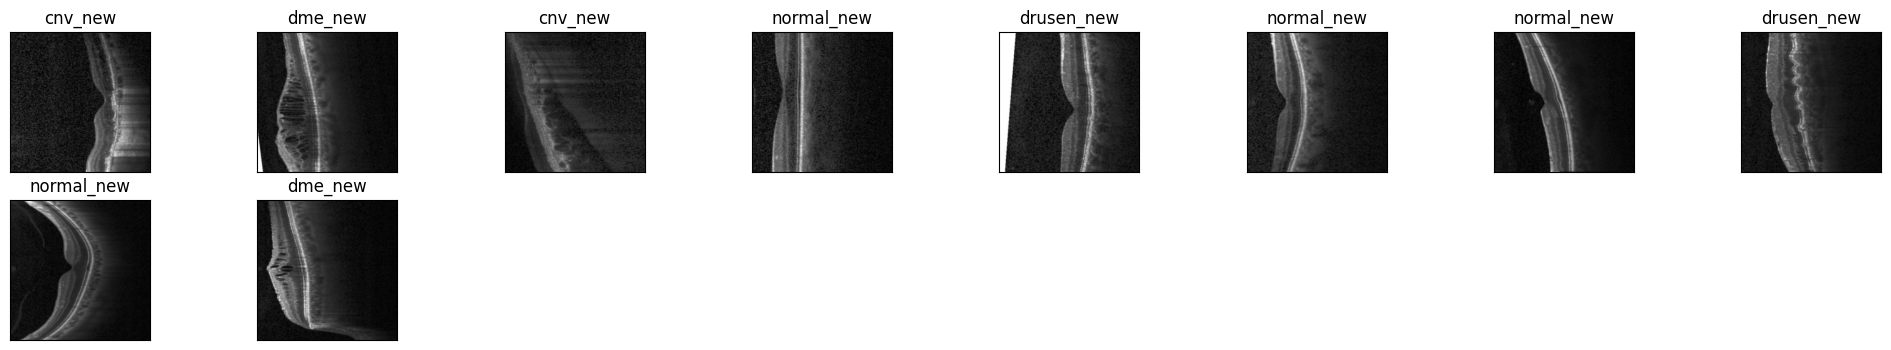

In [ ]:
idx2_class = {v: k for k, v in train_data.class_to_idx.items()}
fig = plt.figure(figsize=(25, 4))
for i in range(10):
    image = np.transpose(images.cpu()[i])
    label = idx2_class[labels.cpu().tolist()[i]]
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title(label)

**Model Training**

VGG16

In [ ]:
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 148MB/s]


In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายoct_mage, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


In [ ]:
n_epochs = 1
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 1.262910103639495, Validation loss = 0.8231094421342362


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.67      0.90      0.77      1290
     dme_new       0.62      0.52      0.57      1290
  drusen_new       0.74      0.46      0.57      1290
  normal_new       0.69      0.82      0.75      1290

    accuracy                           0.68      5160
   macro avg       0.68      0.68      0.66      5160
weighted avg       0.68      0.68      0.66      5160



In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.68      0.91      0.77      1290
     dme_new       0.61      0.51      0.55      1290
  drusen_new       0.74      0.46      0.57      1290
  normal_new       0.68      0.83      0.75      1290

    accuracy                           0.67      5160
   macro avg       0.68      0.67      0.66      5160
weighted avg       0.68      0.67      0.66      5160



  0%|          | 0/162 [00:00<?, ?it/s]

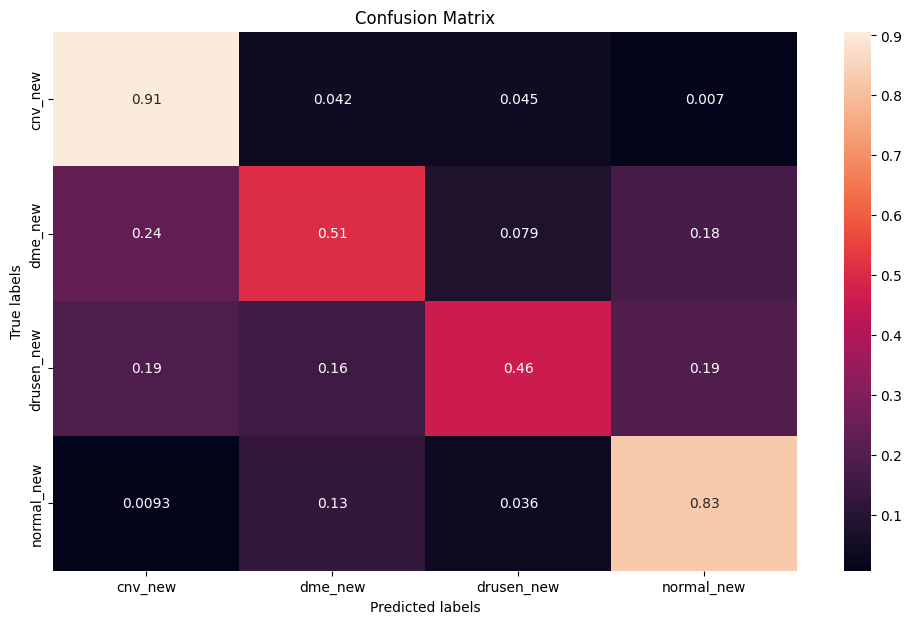

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('cnv_new', 'dme_new', 'drusen_new', 'normal_new')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'vgg16(1).pth')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/vgg16(1).pth'
shutil.move('vgg16(1).pth', destination_path)
print(f"Model moved to {destination_path}")

Model moved to /content/drive/My Drive/vgg16(1)l.pth


In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.7272468097186168, Validation loss = 0.6089187720025233


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.4902830578560053, Validation loss = 0.4613773540470951


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.38306544904296974, Validation loss = 0.3034089965059949


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.3145103334043905, Validation loss = 0.25827555985644807


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.2872698742067101, Validation loss = 0.3052852704427963


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.2871926575923877, Validation loss = 0.25157589087652604


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.2643987636307743, Validation loss = 0.25393343802339347


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.24503556130286863, Validation loss = 0.28189772777548133


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.23530992749967053, Validation loss = 0.22657645021298134


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.23187136922365803, Validation loss = 0.23811566446756208


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.93      0.93      0.93      1290
     dme_new       0.96      0.92      0.94      1290
  drusen_new       0.93      0.90      0.92      1290
  normal_new       0.90      0.98      0.94      1290

    accuracy                           0.93      5160
   macro avg       0.93      0.93      0.93      5160
weighted avg       0.93      0.93      0.93      5160



In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.91      0.91      0.91      1290
     dme_new       0.96      0.93      0.94      1290
  drusen_new       0.93      0.87      0.90      1290
  normal_new       0.90      0.98      0.94      1290

    accuracy                           0.92      5160
   macro avg       0.92      0.92      0.92      5160
weighted avg       0.92      0.92      0.92      5160



  0%|          | 0/162 [00:00<?, ?it/s]

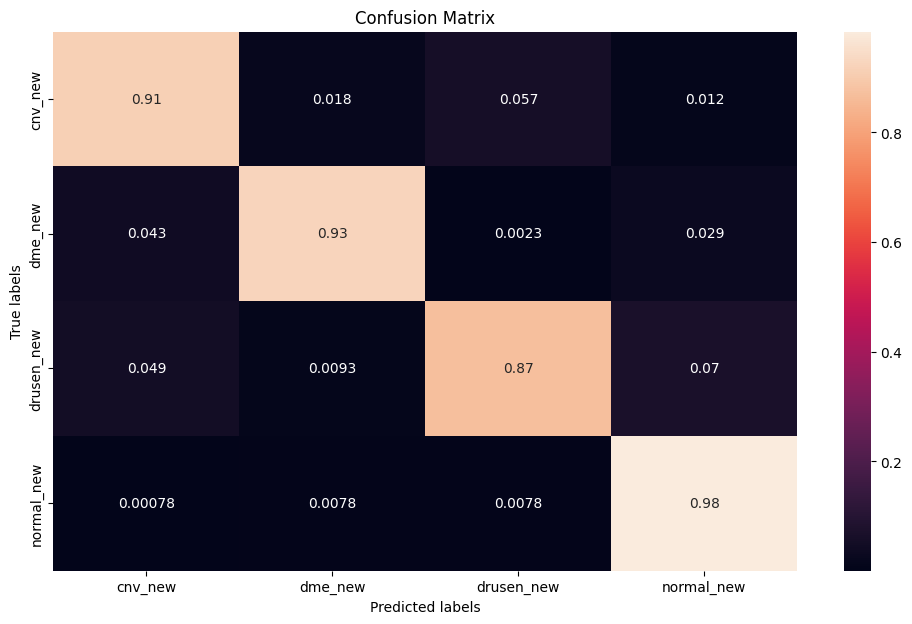

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('cnv_new', 'dme_new', 'drusen_new', 'normal_new')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'vgg16(1) 10ep.pth')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/vgg16(1) 10ep.pth'
shutil.move('vgg16(1) 10ep.pth', destination_path)
print(f"Model moved to {destination_path}")

Model moved to /content/drive/My Drive/vgg16(1) 10ep.pth


confusion matrix

In [ ]:
model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = True
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))
model.load_state_dict(torch.load('/content/drive/My Drive/vgg16(1) 10ep.pth'))
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:09<00:00, 61.0MB/s]
<ipython-input-81-69020c857f01>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to constr

True


  0%|          | 0/162 [00:00<?, ?it/s]

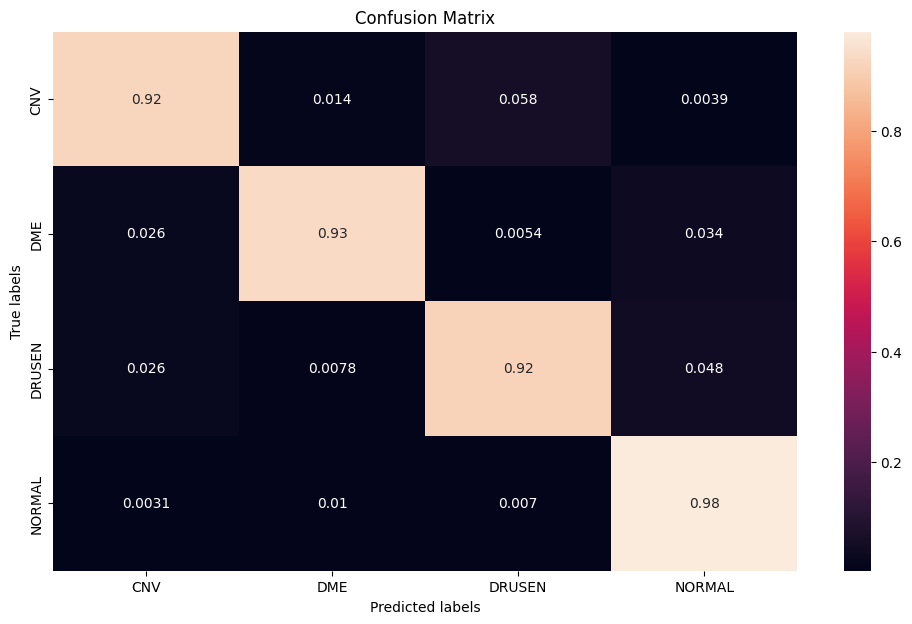

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
from sklearn.ensemble import RandomForestClassifier



y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('CNV', 'DME', 'DRUSEN', 'NORMAL')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

MobileNet

In [ ]:
model = models.mobilenet_v2(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 39.8MB/s]


In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายoct_mage, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.34260405442395875, Validation loss = 0.2675299153345558


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.2061763300922424, Validation loss = 0.18834840638577477


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1770760926210702, Validation loss = 0.2246181886065607


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.15867616259848755, Validation loss = 0.2759286903115639


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.14687404742718138, Validation loss = 0.19836870763277592


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1319618038690813, Validation loss = 0.1779017540604569


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.12625274364821043, Validation loss = 0.18448519229874477


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.11866754289110039, Validation loss = 0.1903162645926887


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1130666989226674, Validation loss = 0.15454281250957053


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.10264870016758278, Validation loss = 0.19749881215862813


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=train_data.classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.91      0.97      0.94      1290
     dme_new       0.99      0.95      0.97      1290
  drusen_new       0.96      0.89      0.92      1290
  normal_new       0.93      0.98      0.95      1290

    accuracy                           0.95      5160
   macro avg       0.95      0.95      0.95      5160
weighted avg       0.95      0.95      0.95      5160



In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=train_data.classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.92      0.97      0.94      1290
     dme_new       0.98      0.94      0.96      1290
  drusen_new       0.95      0.90      0.93      1290
  normal_new       0.93      0.97      0.95      1290

    accuracy                           0.95      5160
   macro avg       0.95      0.95      0.95      5160
weighted avg       0.95      0.95      0.95      5160



  0%|          | 0/162 [00:00<?, ?it/s]

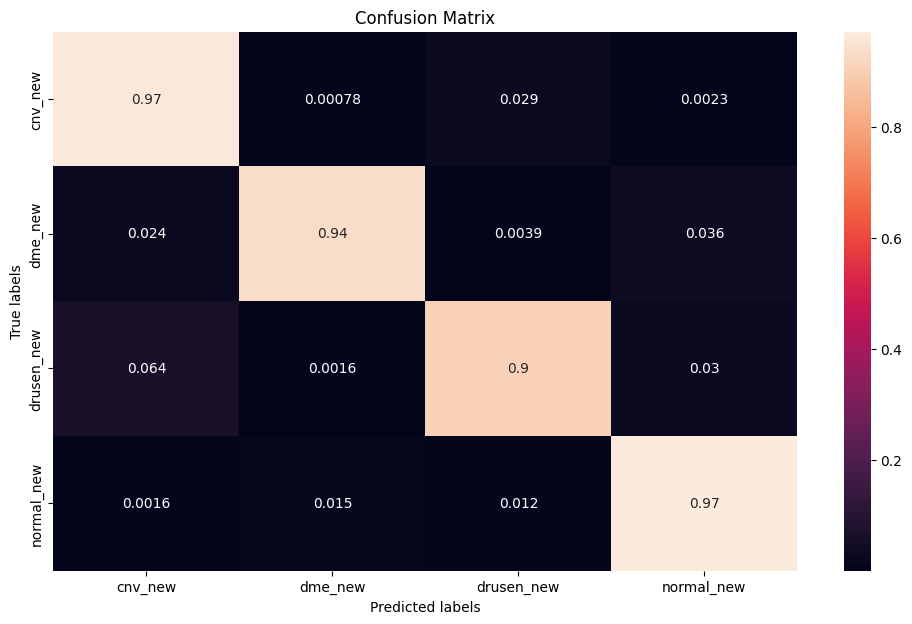

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('cnv_new', 'dme_new', 'drusen_new', 'normal_new')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'MobileNet(1)10ep.pth')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/MobileNet(1)10ep.pth'
shutil.move('MobileNet(1)10ep.pth', destination_path)
print(f"Model moved to {destination_path}")

Model moved to /content/drive/My Drive/MobileNet(1)10ep.pth


  0%|          | 0/162 [00:00<?, ?it/s]

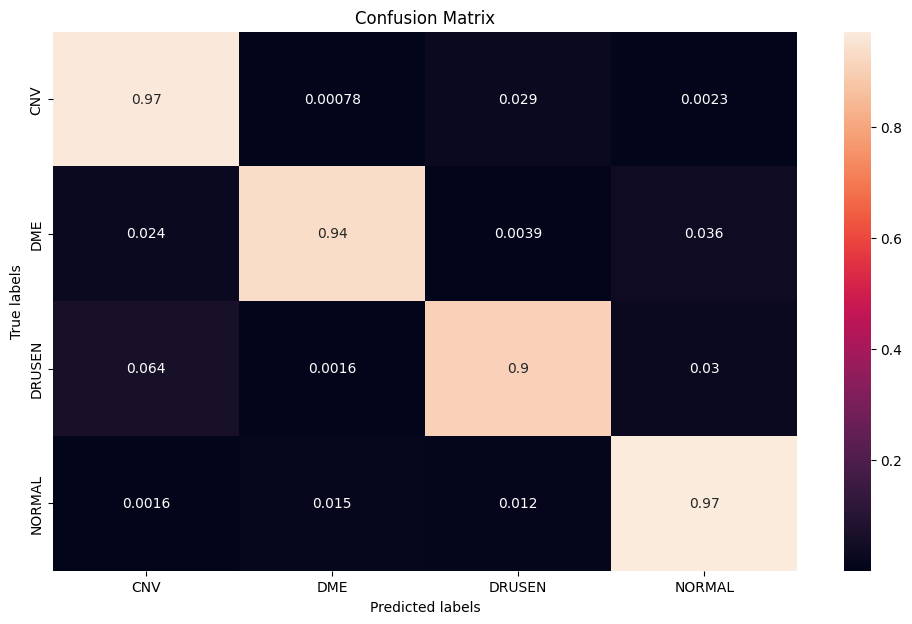

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('CNV', 'DME', 'DRUSEN', 'NORMAL')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

Resnet50

In [ ]:
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = True

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 143MB/s]


In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายoct_mage, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=2048, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.3706290173174139, Validation loss = 0.43668317261419093


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.23944299756688533, Validation loss = 0.29174812855704346


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.19609844393755907, Validation loss = 0.3491675170990386


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.18103311579563094, Validation loss = 0.29089909285751836


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.16950436160587196, Validation loss = 0.24572289332805217


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1570098700206046, Validation loss = 0.23445462695387906


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1443984900858018, Validation loss = 0.19803519951713872


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.13363430963340292, Validation loss = 0.20304432786972254


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.12049121236880356, Validation loss = 0.24676496181030155


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1104813829448037, Validation loss = 0.2237730324188926


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=train_data.classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.89      0.96      0.93      1290
     dme_new       0.97      0.95      0.96      1290
  drusen_new       0.97      0.86      0.91      1290
  normal_new       0.92      0.98      0.95      1290

    accuracy                           0.94      5160
   macro avg       0.94      0.94      0.94      5160
weighted avg       0.94      0.94      0.94      5160



In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=train_data.classes))

  0%|          | 0/162 [00:00<?, ?it/s]

              precision    recall  f1-score   support

     cnv_new       0.89      0.96      0.92      1290
     dme_new       0.97      0.95      0.96      1290
  drusen_new       0.97      0.88      0.92      1290
  normal_new       0.94      0.98      0.96      1290

    accuracy                           0.94      5160
   macro avg       0.94      0.94      0.94      5160
weighted avg       0.94      0.94      0.94      5160



  0%|          | 0/162 [00:00<?, ?it/s]

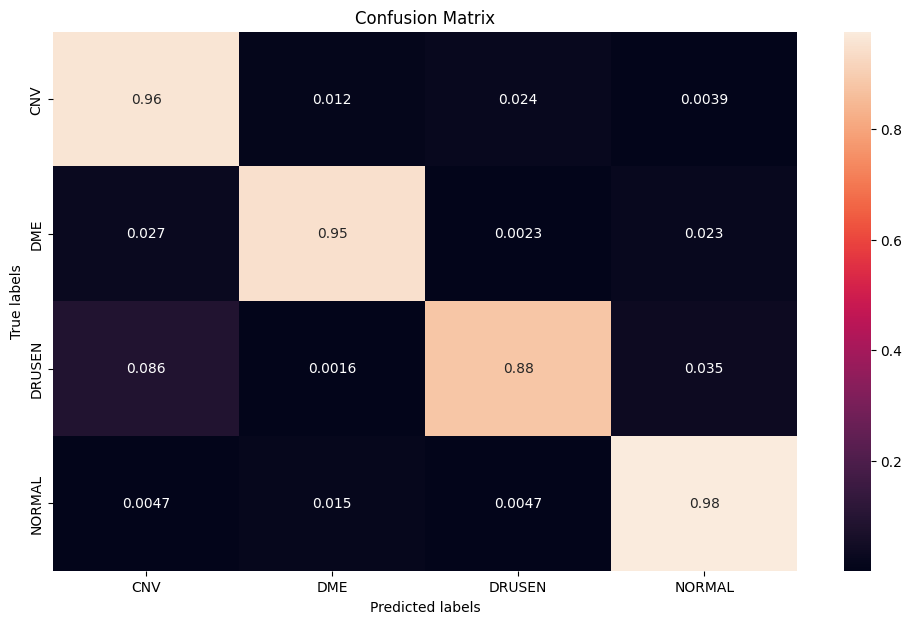

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('CNV', 'DME', 'DRUSEN', 'NORMAL')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'pip.pth')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/resnet50(1)10ep.pth'
shutil.move('resnet50(1)10ep.pth', destination_path)
print(f"Model moved to {destination_path}")

Model moved to /content/drive/My Drive/resnet50(1)10ep.pth


  0%|          | 0/162 [00:00<?, ?it/s]

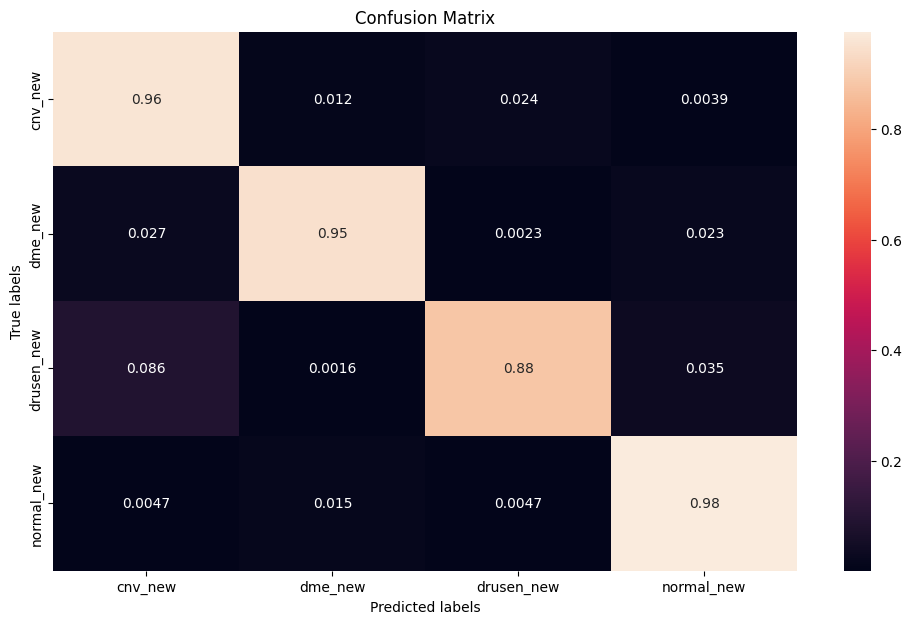

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('cnv_new', 'dme_new', 'drusen_new', 'normal_new')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

Simple CNN :)

In [ ]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, len(train_data.classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = SimpleCNN()  # Move model to GPU
for param in model.parameters():
    param.requires_grad = True

In [ ]:
# เปลี่ยนพารามิเตอร์ใน fc ให้สำหรับทำนายoct_mage, เช็คก่อนเสมอว่าโมเดลหน้าตาเป็นอย่างไร
model.fc = nn.Linear(in_features=512, out_features=len(train_data.classes))

In [ ]:
# สร้าง loss, optimizer
cross_entropy = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.001)

In [ ]:
# เช็คว่ามี GPU ที่สามารถใช้ได้มั้ย ถ้าใช้ได้นำโมเดลเข้าไปอยู่ใน GPU
gpu = torch.cuda.is_available()
print(gpu)
if gpu:
    model.cuda()

True


In [ ]:
n_epochs = 10
for epoch in range(n_epochs):
    # ช่วง train
    model.train()
    train_loss, val_loss = 0, 0
    for images, labels in tqdm(train_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        optimizer.zero_grad()
        pred = model(images) # คำนวณหา output (pred) จาก โมเดลที่มีอยู่
        loss = cross_entropy(pred, labels)
        loss.backward() # คำนวณ gradient จาก loss ที่ได้
        optimizer.step() # อัพเดทพารามิเตอร์ของโมเดล
        train_loss += loss.item() * images.size(0)

    # ช่วง validate
    model.eval() # เซ็ตเป็น evaluation mode
    for images, labels in tqdm(val_loader):
        if gpu:
            images, labels = images.cuda(), labels.cuda()
        pred = model(images)
        loss = cross_entropy(pred, labels)
        val_loss += loss.item() * images.size(0)
    print("Training loss = {}, Validation loss = {}".format(train_loss / n_train, val_loss / n_val))

  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 1.297562890551811, Validation loss = 0.9821297604908314


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.8113293264791419, Validation loss = 0.7249814403149508


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.5832048408612857, Validation loss = 0.6335972413536191


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.4079992602235851, Validation loss = 0.7134585832902628


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.2698559590550356, Validation loss = 0.6289903023446253


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.1546094242173968, Validation loss = 0.6963581714981286


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.08446448379292143, Validation loss = 0.8144986508428589


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.04938708460608194, Validation loss = 0.9590414219586424


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.04159025750710842, Validation loss = 0.9863056946170422


  0%|          | 0/753 [00:00<?, ?it/s]

  0%|          | 0/162 [00:00<?, ?it/s]

Training loss = 0.02755386011800311, Validation loss = 1.0642595455628032


In [ ]:
# คำนวณหา classification report สำหรับ validation set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(val_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

  0%|          | 0/162 [00:00<?, ?it/s]

In [ ]:
# คำนวณหา classification report สำหรับ test set
y_pred, y_true = [], []
model.eval() # เซ็ตเป็น evaluation mode
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)
print(classification_report(y_true, y_pred, target_names=classes))

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('cnv_new', 'dme_new', 'drusen_new', 'normal_new')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn


y_pred = [] # save predction
y_true = [] # save ground truth

    # iterate over data
for images, labels in tqdm(test_loader):
    if gpu:
        images, labels = images.cuda(), labels.cuda()
    pred = model(images)
    yp = pred.argmax(dim=1).tolist()
    yt = labels.tolist()
    y_pred.extend(yp)
    y_true.extend(yt)


    # constant for classes
classes = ('CNV', 'DME', 'DRUSEN', 'NORMAL')

    # Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index=[i for i in classes],columns=[i for i in classes])
plt.figure(figsize=(12, 7))
sn.heatmap(df_cm, annot=True).get_figure()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Save confusion matrix as an image file
plt.savefig('confusion_matrix.png')
plt.show()

In [ ]:
torch.save(model.state_dict(), 'CNN(1) 10ep.pth')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/CNN(1) 10ep.pth'
shutil.move('CNN(1) 10ep.pth', destination_path)
print(f"Model moved to {destination_path}")

epochs 30

CNN

In [ ]:

import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, len(train_dataset.classes))

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 56 * 56)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize model, criterion, and optimizer
model = SimpleCNN().to(device)  # Move model to GPU
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1):  # Adjust epochs as needed
    model.train()
    for images, labels in balanced_train_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch + 1}, Loss: {loss.item()}')

# Evaluation on Test Data
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())  # Move labels back to CPU
        all_preds.extend(predicted.cpu().numpy())  # Move predictions back to CPU

# Calculate metrics
accuracy = accuracy_score(all_labels, all_preds)
report = classification_report(all_labels, all_preds, target_names=test_dataset.classes)
confusion = confusion_matrix(all_labels, all_preds)

print(f'Test Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_dataset.classes, yticklabels=test_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


Epoch 1, Loss: 0.07876402884721756
Test Accuracy: 97.11%
Classification Report:
              precision    recall  f1-score   support

         CNV       0.96      0.97      0.97       242
         DME       0.97      0.95      0.96       242
      DRUSEN       0.98      0.99      0.98       242
      NORMAL       0.98      0.98      0.98       242

    accuracy                           0.97       968
   macro avg       0.97      0.97      0.97       968
weighted avg       0.97      0.97      0.97       968



NameError: name 'sns' is not defined

<Figure size 1000x700 with 0 Axes>

In [ ]:
# Evaluation on Test set
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())  # Move labels back to CPU
        all_preds.extend(predicted.cpu().numpy())  # Move predictions back to CPU


In [ ]:
# Evaluation on Validation Data
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)  # Move data to GPU
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())


In [ ]:
# After training the model
torch.save(model.state_dict(), 'cnn1_model.pth')
print("Model saved to cnn1_model.pth")

# Later on, to load the model
loaded_model = SimpleCNN()
loaded_model.load_state_dict(torch.load('cnn1_model.pth'))
loaded_model.eval()
print("Model loaded from cnn1_model.pth")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import shutil
# Move the file to Google Drive
destination_path = '/content/drive/My Drive/cnn1_model.pth'
shutil.move('cnn1_model.pth', destination_path)
print(f"Model moved to {destination_path}")


In [ ]:

#from torch.utils.data import DataLoader

# Define data directories
#train_dir = os.path.join('/content/kermany2018/OCT2017 /train')
#val_dir= os.path.join('/content/kermany2018/OCT2017 /val')
#test_dir= os.path.join('/content/kermany2018/OCT2017 /test')

# Data augmentation and preprocessing
#data_transforms = {
  #  'train': transforms.Compose([
    #    transforms.Resize((224, 224)),
     #   transforms.RandomHorizontalFlip(),
     #   transforms.RandomRotation(20),
     #   transforms.ToTensor(),
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
   # ]),
   # 'val': transforms.Compose([
    #    transforms.Resize((224, 224)),
    #    transforms.ToTensor(),
   #     transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    #]),
   # 'test': transforms.Compose([
    #    transforms.Resize((224, 224)),
    #    transforms.ToTensor(),
    #    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
   # ]),
#}

#image_datasets = {x: datasets.ImageFolder(root=eval(f'{x}_dir'), transform=data_transforms[x]) for x in ['train', 'val', 'test']}
#dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4) for x in ['train', 'val', 'test']}
#dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val', 'test']}
#class_names = image_datasets['train'].classes

#device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
#print(f'Number of training images: {dataset_sizes["train"]}')
#print(f'Number of validation images: {dataset_sizes["val"]}')
#print(f'Number of test images: {dataset_sizes["test"]}')

Number of training images: 83484
Number of validation images: 32
Number of test images: 968


In [ ]:
# Extracting file paths and classes to create the DataFrame
#data = []

#for phase in ['train', 'val', 'test']:
 #   for img_path, class_idx in image_datasets[phase].samples:
  #      class_name = image_datasets[phase].classes[class_idx]
  #      data.append((img_path, class_name))

# Create a DataFrame
#df = pd.DataFrame(data, columns=['Path', 'Class'])

# Display the DataFrame
#print(df.head())
#print(df.tail())

                                                Path Class
0  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
1  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
2  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
3  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
4  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
                                                    Path   Class
84479  /content/kermany2018/OCT2017 /test/NORMAL/NORM...  NORMAL
84480  /content/kermany2018/OCT2017 /test/NORMAL/NORM...  NORMAL
84481  /content/kermany2018/OCT2017 /test/NORMAL/NORM...  NORMAL
84482  /content/kermany2018/OCT2017 /test/NORMAL/NORM...  NORMAL
84483  /content/kermany2018/OCT2017 /test/NORMAL/NORM...  NORMAL


In [ ]:
#df.head()

Path Class
0  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
1  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
2  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
3  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV
4  /content/kermany2018/OCT2017 /train/CNV/CNV-10...   CNV